<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/wip/EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algorithm 1 Generate a random TSP instance.
def randomInstance(size):
  for i = 1 → size do 
    instance[i, 1] ← U(0, 1) #? Uniform random number between 0 and 1 
    instance[i, 2] ← U(0, 1) #? Uniform random number between 0 and 1
  return instance


In [ ]:
# Algorithm 2 EA for evolving problem easy and hard TSP instances
def EA(popSize, instSize, generations, time_limit, cells, repetitions, type, rnd, mutationParameters):
  poolSize ← ?popSize/2? 
  for i = 1 → popSize do 
    population[i] ← rescale(randomInstance(instSize)) 
    population[i] ← round(population[i], cells) 
    if rnd then 
    population[i] ← normalMutation(population[i]) 
    population[i] ← CutToBoundary(population[i])

  for generation = 1 → generations do 
    for k = 1 → popSize do 
    fitness[k] ← computeFitness(population[k], repetitions)

  matingPool ← createMatingPool(poolSize, population, fitness) 
  nextPopulation[1] ← population[bestOf(fitness)] ? 1-elitism

    for k = 2 → popSize do 
    parent1 ← randomElement(matingPool) 
    parent2 ← randomElement(matingPool) 
    offspring ← uniformMutation(uniformCrossover(parent1, parent2)) # uniformMutation
    if !rnd then 
      offspring ← normalMutation(offspring)
    offspring ← rescale(offspring) 
    offspring ← round(offspring, cells) 
    if rnd then 
    offspring ← normalMutation(offspring) 
    offspring ← CutToBoundary(offspring)

  population ← nextPopulation 
  if over time limit time_limit then 
  return population


In [ ]:
# Algorithm 3 Compute Fitness
def ComputeFitness(instance, repetitions):
  optimalTourLength ← concorde(instance)     #CONCORDE
  for j = 1 → repetitions do 
    twoOptTourLengths[j] ← twoOpt(instance) # Two Opt Tour length

  return mean(twoOptTourLengths)/optimalTourLength



In [ ]:
# Algorithm 4 Mating pool creation
def createMatingPool(poolSize, population, fitness):
  for i = 1 → poolSize do 
  matingPool[i] ← betterOf(randomElement(population), randomElement(population))

  return matingPool


In [ ]:
# Algorithm 5 Rescale instance

def rescale(instance):
  mins ← column_mins(instance)
  maxs ← column_maxs(instance)
  scaledPop ← ((instance − mins)**T/(maxs − mins))**T  
  
  return scaledPop

In [ ]:
# Algorithm 6 Round instance

def round(instance, cells) 
  gridRnd ← createGrid(resolution = cells) 
  instRnd ← floor(instance ∗ cells)/cells 
  for i = 1 → instSize do
    instRnd[i, ] < −SetToCellCenter(instRnd, gridRnd)
  return instRnd

In [178]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt


In [179]:
# Algorithm 1 Generate a random TSP instance.
def randomInstance(size):

  instance = []
  
  for i in range(size):
    instance.append((random.uniform(0, 1),random.uniform(0, 1)))

  return instance

In [180]:
# Algorithm 3 Compute Fitness
def ComputeFitness(population):

  fitnessResults = {}

  def routeDistance(route):

    pathDistance = 0

    for i in range(len(route)):
      fromCity = route[i]
      toCity = None
      if i + 1 < len(route):
        toCity = route[i + 1]
      else:
        toCity = route[0]

      pathDistance += np.linalg.norm(np.array(fromCity) - np.array(toCity))

    return pathDistance

  for i in range(0,len(population)):
    fitnessResults[i] = 1/routeDistance(population[i])

  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)



In [181]:
# Algorithm 2 EA for evolving problem easy and hard TSP instances
def EA(popSize, instSize, generations, time_limit, cells, repetitions, type, rnd, mutationParameters):

  cityList = randomInstance(instSize)

  population = [] #first generation
  for i in range(popSize):
    population.append(random.sample(cityList, len(cityList))) # randomly select the order in which we visit each city.

  popRanked = ComputeFitness(population)
  print("Initial distance: " + str(popRanked[0][1]))
  
  for i in range(generations):
    popRanked = ComputeFitness(population)
    matingpool = matingPool(poolSize, population, popRanked)
    offspring = breedPopulation(matingpool, eliteSize)
    population = mutatePopulation(offspring, mutationRate)
  
  print("Final distance: " + str(popRanked[0][1]))
  bestRoute = population(popRanked[0][0])

  return population

  # poolSize ← ?popSize/2? 
  # for i = 1 → popSize do 
  #   population[i] ← rescale(randomInstance(instSize)) 
  #   population[i] ← round(population[i], cells) 
  #   if rnd then 
  #   population[i] ← normalMutation(population[i]) 
  #   population[i] ← CutToBoundary(population[i])

  # for generation = 1 → generations do 
  #   for k = 1 → popSize do 
  #   fitness[k] ← computeFitness(population[k], repetitions)

  # matingPool ← createMatingPool(poolSize, population, fitness) 
  # nextPopulation[1] ← population[bestOf(fitness)] ? 1-elitism

  #   for k = 2 → popSize do 
  #   parent1 ← randomElement(matingPool) 
  #   parent2 ← randomElement(matingPool) 
  #   offspring ← uniformMutation(uniformCrossover(parent1, parent2)) # uniformMutation
  #   if !rnd then 
  #     offspring ← normalMutation(offspring)
  #   offspring ← rescale(offspring) 
  #   offspring ← round(offspring, cells) 
  #   if rnd then 
  #   offspring ← normalMutation(offspring) 
  #   offspring ← CutToBoundary(offspring)

  # population ← nextPopulation 
  # if over time limit time_limit then 
  # return population

In [177]:
popRanked = ComputeFitness(population)
print("Initial distance: " + str(popRanked[0][1]))

Initial distance: 0.08852560494068941


In [182]:
# Algorithm 4 Mating pool creation

def createMatingPool(poolSize, population, popRanked):
  
  matingPool = []
  
  matingpool.append(population[popRanked[0][0]])

  for i in range(poolSize):
    rnd_a = random.randint(0, poolSize)
    rnd_b = random.randint(0, poolSize)

    if popRanked[rnd_a][1] >= popRanked[rnd_b][1]:
      matingpool.append(population[popRanked[rnd_a][0]])
    else:
      matingpool.append(population[popRanked[rnd_b][0]])

  return matingPool

In [183]:
def ordered_crossover(parent1, parent2): # all locations exactly one time.
  child = []
  childP1 = []
  childP2 = []
  
  geneA = int(random.random() * len(parent1))
  geneB = int(random.random() * len(parent1))
  
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)

  for i in range(startGene, endGene):
      childP1.append(parent1[i])
      
  childP2 = [item for item in parent2 if item not in childP1]

  child = childP1 + childP2
  return child

In [184]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = ordered_crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)

    return children

In [185]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [186]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [162]:
popRanked = ComputeFitness(population)

In [163]:
popRanked

[(2, 0.08852560494068941),
 (3, 0.08813025023544094),
 (1, 0.07588977506981232),
 (0, 0.07571093253618874),
 (4, 0.07472421763739634)]

In [164]:
rnd_a = random.randint(0, 3)

In [165]:
rnd_b = random.randint(0, 3)

In [168]:
rnd_a, rnd_b

(2, 0)

In [174]:
popRanked[rnd_a][1]

0.07588977506981232

In [175]:
popRanked[rnd_b][1]

0.08852560494068941

In [176]:
popRanked[rnd_a][1] >= popRanked[rnd_b][1]

False

In [153]:
random.choice([0.0798984481700883, 0.06682841178994736])

0.0798984481700883

In [157]:
instance = randomInstance(25)
instance

[(0.41959249468007, 0.12343515760832546),
 (0.683421514622092, 0.5350296508711315),
 (0.6044276245314084, 0.49403736922821384),
 (0.455976728475619, 0.02043692030744948),
 (0.5178693460584299, 0.674268243524467),
 (0.6633225443908808, 0.8887919538897812),
 (0.09764954533697245, 0.7173567806186109),
 (0.41186441794572437, 0.6403156459061169),
 (0.8717961664849794, 0.4500372777556253),
 (0.4294425236621955, 0.666481544215917),
 (0.675126372508601, 0.9686448046502633),
 (0.14491597037079662, 0.9679691845034403),
 (0.08773515057330417, 0.47057274284875106),
 (0.7515648523137963, 0.4262457408941356),
 (0.694799413305446, 0.32737183380035406),
 (0.6663638038124486, 0.21953005962200278),
 (0.01968727415210314, 0.2077672409238488),
 (0.12793808834461518, 0.6972073572468891),
 (0.6688832832296099, 0.5998324802492045),
 (0.3042320975871464, 0.983401256740969),
 (0.10580026549835375, 0.7286021026536611),
 (0.19496860538792737, 0.7742473296320556),
 (0.9458858496386913, 0.29788065415899456),
 (0.1

In [158]:
route = createRoute(instance)
route

[(0.19496860538792737, 0.7742473296320556),
 (0.09764954533697245, 0.7173567806186109),
 (0.08773515057330417, 0.47057274284875106),
 (0.8717961664849794, 0.4500372777556253),
 (0.3042320975871464, 0.983401256740969),
 (0.4294425236621955, 0.666481544215917),
 (0.6633225443908808, 0.8887919538897812),
 (0.455976728475619, 0.02043692030744948),
 (0.1756602638159973, 0.8817980603520958),
 (0.01968727415210314, 0.2077672409238488),
 (0.41959249468007, 0.12343515760832546),
 (0.6688832832296099, 0.5998324802492045),
 (0.7515648523137963, 0.4262457408941356),
 (0.10580026549835375, 0.7286021026536611),
 (0.6044276245314084, 0.49403736922821384),
 (0.14491597037079662, 0.9679691845034403),
 (0.6663638038124486, 0.21953005962200278),
 (0.12793808834461518, 0.6972073572468891),
 (0.683421514622092, 0.5350296508711315),
 (0.675126372508601, 0.9686448046502633),
 (0.41186441794572437, 0.6403156459061169),
 (0.9458858496386913, 0.29788065415899456),
 (0.694799413305446, 0.32737183380035406),
 (0.

In [ ]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [159]:
population = initialPopulation(5,instance)
population

[[(0.9458858496386913, 0.29788065415899456),
  (0.41959249468007, 0.12343515760832546),
  (0.33665696906894194, 0.9865615357085871),
  (0.19496860538792737, 0.7742473296320556),
  (0.7515648523137963, 0.4262457408941356),
  (0.08773515057330417, 0.47057274284875106),
  (0.6633225443908808, 0.8887919538897812),
  (0.14491597037079662, 0.9679691845034403),
  (0.8717961664849794, 0.4500372777556253),
  (0.10580026549835375, 0.7286021026536611),
  (0.1756602638159973, 0.8817980603520958),
  (0.694799413305446, 0.32737183380035406),
  (0.01968727415210314, 0.2077672409238488),
  (0.455976728475619, 0.02043692030744948),
  (0.683421514622092, 0.5350296508711315),
  (0.09764954533697245, 0.7173567806186109),
  (0.6663638038124486, 0.21953005962200278),
  (0.12793808834461518, 0.6972073572468891),
  (0.41186441794572437, 0.6403156459061169),
  (0.6044276245314084, 0.49403736922821384),
  (0.5178693460584299, 0.674268243524467),
  (0.3042320975871464, 0.983401256740969),
  (0.675126372508601, 0

In [160]:
ranking = rankRoutes(population)

In [161]:
ranking

[(2, 0.08852560494068941),
 (3, 0.08813025023544094),
 (1, 0.07588977506981232),
 (0, 0.07571093253618874),
 (4, 0.07472421763739634)]

In [ ]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness












0.233453162446846

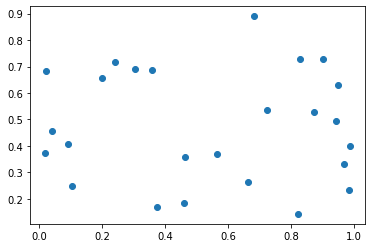

In [ ]:

plt.scatter(*zip(*instance))

plt.show()

In [ ]:
x

array([0.18751996, 0.50945669, 0.00321079, 0.70366955, 0.99054547,
       0.82206771, 0.53719478, 0.42652522, 0.81255149, 0.5755192 ])

In [ ]:
x[0:0+2]

array([0.18751996, 0.50945669])

In [ ]:
# Create first "population" (list of routes)
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

0.9948276008607537